In [1]:
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\PC\\Desktop\\IT Innovation\\project\\data\\airbnb_Chicago.csv')

# These columns are chosen for their relevance to Airbnb property analysis
selected_columns = [
    'Airbnb Property ID', 'superhost_period_all', 'host_is_superhost_in_period', 'numCancel_pastYear',
    'prop_5_StarReviews_pastYear', 'numReserv_pastYear', 'hostResponseAverage_pastYear', 'Pets Allowed',
    'Property Type', 'Bedrooms', 'Bathrooms', 'Cleaning Fee (USD)', 'Rating Overall', 'occupancy_rate',
    'zip_total_population', 'zip_hispanic_or_latino_anyrace_percent', 'Number of Reviews',
    'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent', 'zip_asian_nothispanic_percent',
    'rating_ave_pastYear', 'numReviews_pastYear', 'numReservedDays_pastYear', 'prev_revenue', 
    'prev_occupancy_rate', 'tract_prev_superhosts', 'tract_prev_superhosts_ratio', 'prev_Rating Overall', 
    'prev_Number of Reviews', 'prev_Nightly Rate'
]


# Create a new dataframe with selected columns
data = df[selected_columns]

# Display the shape of the new dataframe (number of rows and columns)
print("Shape of the new dataframe:", data.shape)

# Display the first few rows of the new dataframe
print("First 5 rows of the new dataframe:")
print(data.head())

Shape of the new dataframe: (120217, 30)
First 5 rows of the new dataframe:
   Airbnb Property ID  superhost_period_all  host_is_superhost_in_period  \
0              1947.0                  13.0                          0.0   
1              1947.0                  15.0                          0.0   
2              1947.0                  18.0                          1.0   
3              1947.0                  19.0                          0.0   
4              1947.0                  20.0                          0.0   

   numCancel_pastYear  prop_5_StarReviews_pastYear  numReserv_pastYear  \
0                 0.0                     1.000000                 5.0   
1                 1.0                     1.000000                21.0   
2                 0.0                     0.733333                32.0   
3                 0.0                     0.687500                34.0   
4                 0.0                     0.769231                44.0   

   hostResponseAverage

In [2]:
# These variables define minimum performance criteria for two distinct categories, 'JM' and 'JP', 
# based on star ratings, reservation counts, host response rates, and cancellation limits.

JustMiss_MinStarRating=0.7

JustMiss_MinReservationCount=8

JustMiss_MinHostResponseRate=80

JustMiss_MaxCancellationCount=5

JustPass_MinStarRating=0.9

JustPass_MinReservationCount=12

JustPass_MinHostResponseRate=95

In [3]:
# period variable diclaration 14,15,16 are quaters 

p1 = 14
p2 = 15
p3 = 16

In [4]:
data_1 = data[
    (data['prop_5_StarReviews_pastYear'] >= JustMiss_MinStarRating) &
    (data['numReserv_pastYear'] >= JustMiss_MinReservationCount) &
    (data['hostResponseAverage_pastYear'] >= JustMiss_MinHostResponseRate) &
    (data['numCancel_pastYear'] <= JustMiss_MaxCancellationCount) &
    (data['host_is_superhost_in_period'] == 0) &
    (data['superhost_period_all'] == p1)
]


In [5]:
# Data_2thPeriodNearMiss_JM
Data_2thPeriodNearMiss_JM = data[(
    (data['prop_5_StarReviews_pastYear'] >= JustMiss_MinStarRating) &
    (data['numReserv_pastYear'] >= JustMiss_MinReservationCount) &
    (data['hostResponseAverage_pastYear'] >= JustMiss_MinHostResponseRate) &
    (data['numCancel_pastYear'] <= JustMiss_MaxCancellationCount) &
    (data['host_is_superhost_in_period'] == 0)&
    (data['superhost_period_all'] == p2)
)]
Data_2thPeriodNearMiss_JM['treatment'] = 0
# Data_2thPeriodPass_JP
Data_2thPeriodPass_JP = data[
    ((data['prop_5_StarReviews_pastYear'] <= JustPass_MinStarRating) |
    (data['numReserv_pastYear'] <= JustPass_MinReservationCount) |
    (data['hostResponseAverage_pastYear'] <= JustPass_MinHostResponseRate)) &
    (data['host_is_superhost_in_period'] == 1)&
    (data['superhost_period_all'] == p2)
]
Data_2thPeriodPass_JP['treatment'] = 1

data_2 = pd.concat([Data_2thPeriodNearMiss_JM, Data_2thPeriodPass_JP], axis=0, ignore_index=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_17292\1520691241.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2thPeriodNearMiss_JM['treatment'] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_17292\1520691241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2thPeriodPass_JP['treatment'] = 1


In [6]:
# Merge DataFrames: Combine 'data_1' and 'data_2' DataFrames
# The merge is based on the 'Airbnb Property ID' column.
# This operation performs a left join, adding the 'treatment' column from 'data_2' to 'data_1'.
# The 'how' parameter set to 'left' ensures all records from 'data_1' are retained,
# while matching records from 'data_2' are merged based on the 'Airbnb Property ID'.
data_1 = pd.merge(data_1, data_2[['Airbnb Property ID', 'treatment']], on='Airbnb Property ID', how='left')


In [7]:
# Identify Common Property IDs Between Two DataFrames
# This creates a Pandas Series containing Airbnb Property IDs that are present in both 'data_2' and 'data_1'.
common_property_ids = pd.Series(list(set(data_2['Airbnb Property ID']).intersection(set(data_1['Airbnb Property ID']))))

# Filter Both DataFrames for Common Property IDs
# 'dffil1' and 'dffil2' are new DataFrames created by filtering 'data_2' and 'data_1' respectively.
# They include only those rows where 'Airbnb Property ID' matches the common IDs identified above.
dffil1 = data_2[data_2['Airbnb Property ID'].isin(common_property_ids)]
dffil2 = data_1[data_1['Airbnb Property ID'].isin(common_property_ids)]

# Concatenate the Filtered DataFrames
# The filtered DataFrames are concatenated to form a single DataFrame 'df'.
# This combines the rows from both 'dffil1' and 'dffil2'.
df = pd.concat([dffil1, dffil2])


In [8]:
df['period'] = df['superhost_period_all'].map({p1: 0, p2: 1})

In [9]:
df = df.dropna()



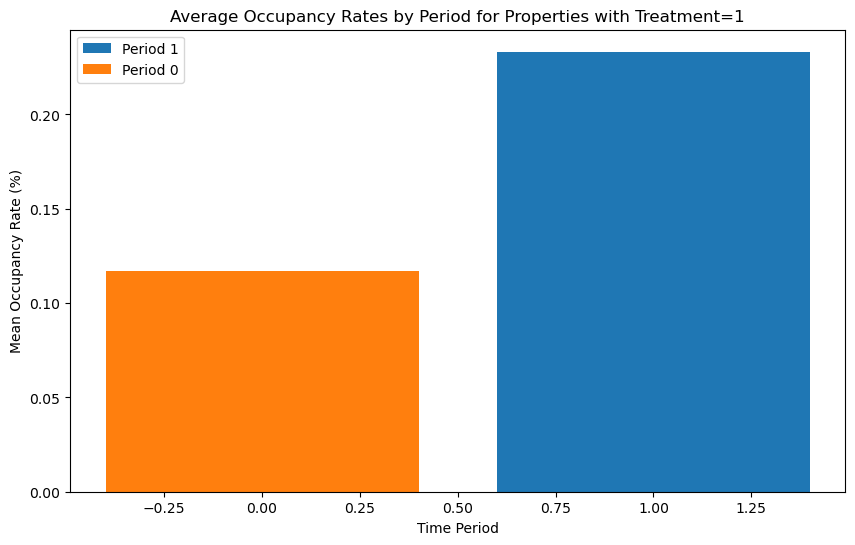

In [10]:
import matplotlib.pyplot as plt

# Filter DataFrame for Treatment Group
# Selects rows from 'df' where the 'treatment' column is equal to 1, creating a new DataFrame 'TreatmentGroupFiltered_df'.
TreatmentGroupFiltered_df = df[df['treatment'] == 1]

# Create and Plot Bar Chart for Occupancy Rates
# Initializes a figure for the bar chart with a specified size.
plt.figure(figsize=(10, 6))

# Loop Through Unique Periods
# For each unique period in 'df', calculate and plot the average occupancy rate of the treatment group.
for period in df['period'].unique():
    # Filter 'TreatmentGroupFiltered_df' for the current period and calculate the mean occupancy rate.
    SpecificPeriodOccupancy_df = TreatmentGroupFiltered_df[TreatmentGroupFiltered_df['period'] == period]
    # Plot a bar for the mean occupancy rate of each period.
    plt.bar(period, SpecificPeriodOccupancy_df['occupancy_rate'].mean(), label=f'Period {period}')

# Set Chart Title and Axis Labels
# Adds a title, x-axis label, and y-axis label to the bar chart.
plt.title('Average Occupancy Rates by Period for Properties with Treatment=1')
plt.xlabel('Time Period')
plt.ylabel('Mean Occupancy Rate (%)')

# Add Legend and Display Chart
# Displays a legend for the chart and shows the final plot.
plt.legend()
plt.show()


In [11]:
# Filter rows where superhost_period_all equals 16
data_3 = data[data['superhost_period_all'] == p3]


In [12]:
# Check for duplicate values in 'Airbnb Property ID' in data_2 or data_3
duplicate_ids_1 = data_2['Airbnb Property ID'].duplicated()
duplicate_ids_2 = data_3['Airbnb Property ID'].duplicated()

# Merge df with data_2 and data_3 based on 'Airbnb Property ID'
ConsolidatedProperties_df = pd.merge(df, data_2[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_11'))
ConsolidatedProperties_df = pd.merge(ConsolidatedProperties_df, data_3[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_12'))

# Create a new column 'occupancy_rate_next' in df based on the values from data_2 and data_3
df['occupancy_rate_next'] = None  # Initialize the column with None

# Reset the index to avoid non-unique column names issue
ConsolidatedProperties_df = ConsolidatedProperties_df.reset_index(drop=True)
df = df.reset_index(drop=True)

# Rename columns to make them unique
ConsolidatedProperties_df = ConsolidatedProperties_df.rename(columns={'occupancy_rate_11': 'occupancy_rate_11', 'occupancy_rate_12': 'occupancy_rate_12'})

# Convert the 'occupancy_rate_next' column to float
df['occupancy_rate_next'] = pd.to_numeric(ConsolidatedProperties_df['occupancy_rate_11'], errors='coerce').where(df['period'] == 0, pd.to_numeric(ConsolidatedProperties_df['occupancy_rate_12'], errors='coerce'))


In [13]:
# Drop Missing Values and Update DataFrame
# Removes rows with any missing values (NaN) from the DataFrame 'df'.
df = df.dropna()



In [14]:
# Import Required Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Interaction Term Creation
# Calculate an interaction term by multiplying 'period' and 'treatment' columns in the DataFrame 'df'.
df['interaction_term'] = df['period'] * df['treatment']

# Define Predictor Variables (Features)
# Select a set of explanatory variables for the regression model and create a DataFrame 'X'.
X = df[['period', 'treatment', 'interaction_term', 'prop_5_StarReviews_pastYear', 'rating_ave_pastYear', 
        'Property Type', 'Pets Allowed', 'prev_Number of Reviews', 'Bedrooms', 'Bathrooms', 
        'Number of Reviews', 'zip_hispanic_or_latino_anyrace_percent', 'zip_white_nothispanic_percent', 
        'zip_black_nothispanic_percent', 'zip_asian_nothispanic_percent']]

# Convert Categorical Variables to Dummy Variables
# Apply one-hot encoding to categorical features to make them suitable for the regression model.
X = pd.get_dummies(X, columns=['Pets Allowed', 'Property Type'])

# Define Response Variable
# Transform the 'occupancy_rate' column using a log transformation and assign it to 'y'.
y = np.log1p(df[['occupancy_rate']])

# Add Constant to Predictor Variables
# Add a constant term to 'X' to include an intercept in the regression model.
X = sm.add_constant(X)

# Fit the Regression Model
# Initialize and fit an Ordinary Least Squares (OLS) regression model using 'X' and 'y'.
model = sm.OLS(y, X)
results = model.fit()

# Print the Summary of the Regression Model
# Display a summary of the regression results, including coefficients and diagnostics.
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           2.79e-60
Time:                        21:25:45   Log-Likelihood:                 1276.3
No. Observations:                1303   AIC:                            -2497.
Df Residuals:                    1275   BIC:                            -2352.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

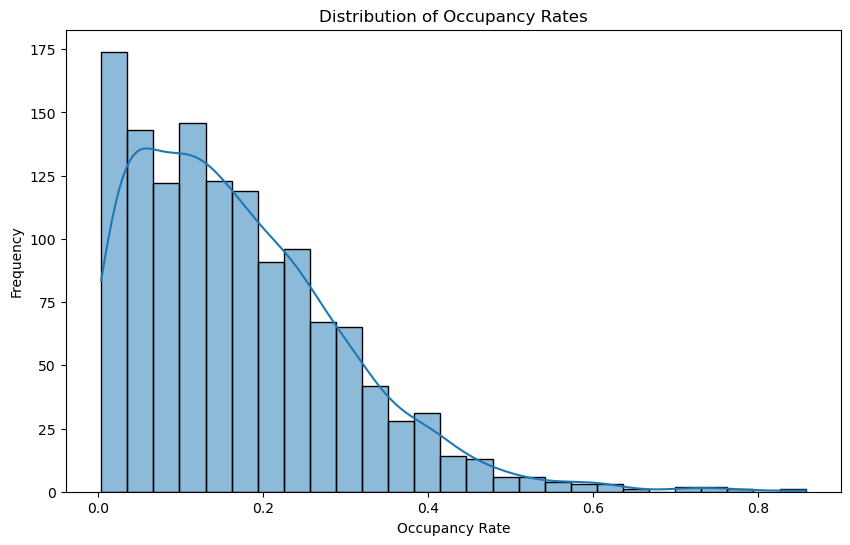

Mean Occupancy Rate: 0.17076232058030028


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check if 'occupancy_rate' column is present in the dataset
if 'occupancy_rate' in df.columns:
    # Plotting the distribution of occupancy rates
    plt.figure(figsize=(10, 6))
    sns.histplot(df['occupancy_rate'], kde=True)
    plt.title('Distribution of Occupancy Rates')
    plt.xlabel('Occupancy Rate')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("'occupancy_rate' column not found in the dataset.")
# Calculate the mean of the 'occupancy_rate' column
occupancy_rate_mean = df['occupancy_rate'].mean()

# Print the mean
print("Mean Occupancy Rate:", occupancy_rate_mean)